In [36]:
import pandas as pd

In [37]:
df1 = pd.read_csv('data/csv/us_election_2020_1st_presidential_debate.csv')
df2 = pd.read_csv('data/csv/us_election_2020_2nd_presidential_debate.csv')

In [38]:
df1.head()

,speaker,minute,text
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...
1,Chris Wallace,02:10,This debate is being conducted under health an...
2,Vice President Joe Biden,02:49,"How you doing, man?"
3,President Donald J. Trump,02:51,How are you doing?
4,Vice President Joe Biden,02:51,I’m well.


In [39]:
df2.head()

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...


In [40]:
print('1st Dataframe: ' + str(df1.shape))
print('\n')
print('2nd Dataframe: ' + str(df2.shape))

1st Dataframe: (789, 3)


2nd Dataframe: (512, 3)


In [41]:
df1.info()
print('\n')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  789 non-null    object
 1   minute   788 non-null    object
 2   text     789 non-null    object
dtypes: object(3)
memory usage: 18.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  512 non-null    object
 1   minute   512 non-null    object
 2   text     512 non-null    object
dtypes: object(3)
memory usage: 12.1+ KB


In [42]:
df1.describe().transpose()

,count,unique,top,freq
speaker,789,4,President Donald J. Trump,314
minute,788,658,20:57,5
text,789,756,That is not true.,5


In [43]:
df2.describe().transpose()

,count,unique,top,freq
speaker,512,3,Donald Trump,190
minute,512,400,11:03,5
text,512,489,Okay.,7


In [44]:
df1.speaker.value_counts()

President Donald J. Trump    314
Vice President Joe Biden     249
Chris Wallace                225
Chris Wallace:                 1
Name: speaker, dtype: int64

In [45]:
df2.speaker.value_counts()

Donald Trump      190
Kristen Welker    189
Joe Biden         133
Name: speaker, dtype: int64

In [46]:
df1.isnull().any()

speaker    False
minute      True
text       False
dtype: bool

In [47]:
df2.isnull().any()

speaker    False
minute     False
text       False
dtype: bool

In [48]:
df1['minute'].fillna('00:00', inplace=True)

In [52]:
df1.loc[df1['speaker'] == 'Chris Wallace:','speaker'] = 'Chris Wallace'

In [53]:
df1.loc[df1['speaker'] == 'President Donald J. Trump','speaker'] = 'Donald Trump'

In [54]:
df1.loc[df1['speaker'] == 'Vice President Joe Biden','speaker'] = 'Joe Biden'

In [55]:
df1.speaker.value_counts()

Donald Trump     314
Joe Biden        249
Chris Wallace    226
Name: speaker, dtype: int64

In [56]:
df1_1 = df1.iloc[0:179,:]
df1_2 = df1.iloc[179:,:]

In [57]:
def conv_min_2_sec(x):
    temp = list(map(int, x.split(':')))
    total=0
    if len(temp)==2:
        total = (temp[0]*60)+temp[1]
    elif len(temp)==3:
        total = (temp[0]*3600)+(temp[1]*60)+temp[2]
    return total

In [58]:
def calc_diff(dff):
    dff['seconds'] = dff['minute'].apply(conv_min_2_sec)
    dff['seconds_spoken'] = dff['seconds'] - dff['seconds'].shift(-1)
    dff['seconds_spoken'].fillna(0, inplace=True)
    dff['seconds_spoken'] = abs(dff['seconds_spoken'])
    return dff

In [59]:
calc_diff(df1_1)
calc_diff(df1_2)
print('\n')

In [60]:
frames = [df1_1,df1_2]

In [61]:
df1 = pd.concat(frames)

In [62]:
df1.head()

,speaker,minute,text,seconds,seconds_spoken
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80,50.0
1,Chris Wallace,02:10,This debate is being conducted under health an...,130,39.0
2,Joe Biden,02:49,"How you doing, man?",169,2.0
3,Donald Trump,02:51,How are you doing?,171,0.0
4,Joe Biden,02:51,I’m well.,171,20.0


In [63]:
df1.shape

(789, 5)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   speaker         789 non-null    object 
 1   minute          789 non-null    object 
 2   text            789 non-null    object 
 3   seconds         789 non-null    int64  
 4   seconds_spoken  789 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.9+ KB


In [65]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
seconds,789.0,1688.013942,1170.710705,0.0,805.0,1360.0,2528.0,4250.0
seconds_spoken,789.0,7.141952,11.835918,0.0,1.0,2.0,7.0,68.0


In [66]:
df1.drop(['seconds','minute'],axis=1,inplace=True)

In [67]:
df1.head()

,speaker,text,seconds_spoken
0,Chris Wallace,Good evening from the Health Education Campus ...,50.0
1,Chris Wallace,This debate is being conducted under health an...,39.0
2,Joe Biden,"How you doing, man?",2.0
3,Donald Trump,How are you doing?,0.0
4,Joe Biden,I’m well.,20.0


In [68]:
df2_1 = df2.iloc[0:89,:]
df2_2 = df2.iloc[89:337,:]
df2_3 = df2.iloc[337:,:]

In [69]:
df2_1.head()

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...


In [70]:
calc_diff(df2_1)
calc_diff(df2_2)
calc_diff(df2_3)
print('\n')

In [71]:
frames = [df2_1,df2_2,df2_3]

In [72]:
df2 = pd.concat(frames)

In [73]:
df2.head()

,speaker,minute,text,seconds,seconds_spoken
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo...",18,439.0
1,Donald Trump,07:37,How are you doing? How are you?,457,21.0
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...,478,29.0
3,Kristen Welker,08:27,The goal is for you to hear each other and for...,507,36.0
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...,543,1.0


In [74]:
df2.drop(['seconds','minute'],axis=1,inplace=True)

In [75]:
df2.head()

,speaker,text,seconds_spoken
0,Kristen Welker,"Good evening, everyone. Good evening. Thank yo...",439.0
1,Donald Trump,How are you doing? How are you?,21.0
2,Kristen Welker,And I do want to say a very good evening to bo...,29.0
3,Kristen Welker,The goal is for you to hear each other and for...,36.0
4,Kristen Welker,… during this next stage of the coronavirus cr...,1.0


In [76]:
frames = [df1, df2]

In [77]:
df = pd.concat(frames)

In [78]:
df.head()

,speaker,text,seconds_spoken
0,Chris Wallace,Good evening from the Health Education Campus ...,50.0
1,Chris Wallace,This debate is being conducted under health an...,39.0
2,Joe Biden,"How you doing, man?",2.0
3,Donald Trump,How are you doing?,0.0
4,Joe Biden,I’m well.,20.0


In [79]:
df.shape

(1301, 3)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 511
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   speaker         1301 non-null   object 
 1   text            1301 non-null   object 
 2   seconds_spoken  1301 non-null   float64
dtypes: float64(1), object(2)
memory usage: 40.7+ KB


In [81]:
df_candidate=df[df['speaker']!='Chris Wallace']

In [82]:
df_candidate=df_candidate[df_candidate['speaker']!='Kristen Welker']

In [83]:
df_candidate.reset_index(inplace=True, drop=True)

# Longest speaking time

In [43]:
print('Longest speaking time:\n')
print('Speaker: '  + df_candidate.loc[df_candidate['seconds_spoken'].idxmax(),:].speaker +'\n')
print('Seconds Spoken: ' + str(df_candidate.loc[df_candidate['seconds_spoken'].idxmax(),:].seconds_spoken)+'\n')
print('Text: ' + df_candidate.loc[df_candidate['seconds_spoken'].idxmax(),:].text)

Longest speaking time:

Speaker: Joe Biden

Seconds Spoken: 68.0

Text: Gas and oil because the heat will not be going out. There’s so many things that we can do now to create thousands and thousands of jobs. We can get to net zero, in terms of energy production, by 2035. Not only not costing people jobs, creating jobs, creating millions of good-paying jobs. Not 15 bucks an hour, but prevailing wage, by having a new infrastructure that in fact, is green. And the first thing I will do, I will rejoin the Paris Accord. I will join the Paris Accord because with us out of it, look what’s happening. It’s all falling apart. And talk about someone who has no relationship with foreign policy. The rainforests of Brazil are being torn down, are being ripped down. More carbon is absorbed in that rainforest than every bit of carbon that’s emitted in the United States. Instead of doing something about that, I would be gathering up and making sure we had the countries of the world coming up with $20 

# Total seconds spoken

In [44]:
total_sec_spoken = df.groupby('speaker').agg('sum').sort_values(by='seconds_spoken',ascending=False)
total_sec_spoken

,seconds_spoken
speaker,
Joe Biden,4382.0
Donald Trump,4362.0
Chris Wallace,1470.0
Kristen Welker,1335.0


In [45]:
total_sec_spoken.reset_index(inplace=True)

In [46]:
import datetime
for index, row in total_sec_spoken.iterrows():
    print(row['speaker'] + '\t' + str(datetime.timedelta(seconds=row['seconds_spoken'])))

Joe Biden	1:13:02
Donald Trump	1:12:42
Chris Wallace	0:24:30
Kristen Welker	0:22:15


# Most words spoken in one go

In [47]:
df['no_of_words'] = df['text'].apply(lambda x: len(x.split()))

In [48]:
df.sort_values(by='no_of_words', ascending=False).head()

,speaker,text,seconds_spoken,no_of_words
0,Kristen Welker,"Good evening, everyone. Good evening. Thank yo...",439.0,258
337,Joe Biden,"Making sure that you, in fact, if you get pull...",66.0,204
501,Donald Trump,I don’t think you have any law enforcement. Yo...,56.0,199
202,Donald Trump,Pre-existing conditions will always stay. What...,67.0,196
725,Joe Biden,Show up and vote. You will determine the outco...,57.0,192


# Total words spoken

In [49]:
total_words_spoken = df.groupby('speaker').agg('sum').sort_values(by='no_of_words',ascending=False)['no_of_words']
total_words_spoken

speaker
Donald Trump      14836
Joe Biden         13788
Chris Wallace      4674
Kristen Welker     3727
Name: no_of_words, dtype: int64

# Sentiment Analysis:

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

In [51]:
sid = SentimentIntensityAnalyzer()

In [52]:
df['compound_pol'] = [x.get('compound') for x in df['text'].apply(lambda x: sid.polarity_scores(x))]

In [53]:
def calc_sent(df):
    if df['compound_pol'] == 0:
        val = 'Neutral'
    elif df['compound_pol'] > 0:
        val = 'Positive'
    else:
        val = 'Negative'
    return val

In [54]:
df['sentiment'] = df.apply(calc_sent, axis=1)

In [55]:
temp = df.groupby(['speaker','sentiment']).count()
temp

text  seconds_spoken  no_of_words  compound_pol
speaker        sentiment                                                 
Chris Wallace  Negative     35              35           35            35
               Neutral     103             103          103           103
               Positive     88              88           88            88
Donald Trump   Negative    129             129          129           129
               Neutral     206             206          206           206
               Positive    169             169          169           169
Joe Biden      Negative    115             115          115           115
               Neutral     125             125          125           125
               Positive    142             142          142           142
Kristen Welker Negative     20              20           20            20
               Neutral     107             107          107           107
               Positive     62              62           62            62

In [56]:
temp = temp.loc[['Donald Trump','Joe Biden'],'text']

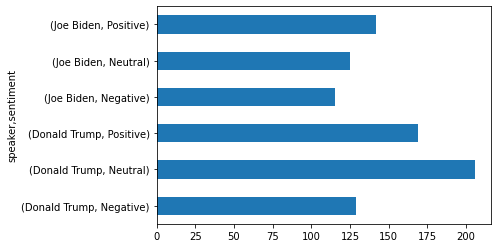

In [57]:
temp.plot.barh(x='speaker')

# Model building

In [58]:
df_candidate.head()

,speaker,text,seconds_spoken
0,Joe Biden,"How you doing, man?",2.0
1,Donald Trump,How are you doing?,0.0
2,Joe Biden,I’m well.,20.0
3,Donald Trump,"Thank you very much, Chris. I will tell you ve...",52.0
4,Donald Trump,And we won the election and therefore we have ...,29.0


In [ ]:
# df_candidate.reset_index(inplace=True, drop=True)

In [59]:
df_candidate.drop(columns=['seconds_spoken'],inplace=True)

In [60]:
df_candidate.head()

,speaker,text
0,Joe Biden,"How you doing, man?"
1,Donald Trump,How are you doing?
2,Joe Biden,I’m well.
3,Donald Trump,"Thank you very much, Chris. I will tell you ve..."
4,Donald Trump,And we won the election and therefore we have ...


In [61]:
import re
import string

def text_process(text):
  text = text.lower() ##Convert into lower
  text = re.sub('\[.*?\]','',text) ## Removing brackets
  text = re.sub('[%s]' % re.escape(string.punctuation), '' , text)  ## remove punctuations
  text = re.sub('\w*\d\w*','',text)
  return text

In [62]:
df_candidate['text'] = df_candidate['text'].apply(text_process)

In [63]:
df_candidate.head()

,speaker,text
0,Joe Biden,how you doing man
1,Donald Trump,how are you doing
2,Joe Biden,i’m well
3,Donald Trump,thank you very much chris i will tell you very...
4,Donald Trump,and we won the election and therefore we have ...


In [66]:
##Model Training

from sklearn.model_selection import train_test_split

ID_V = df_candidate.text ##ID_V = Independent Var
D_V = df_candidate.speaker #D_V = Dependent Var

IDV_train, IDV_test, DV_train, DV_test = train_test_split(ID_V, D_V, test_size=0.25, random_state=42)

print('IDV_train:',len(IDV_train))
print('IDV_test:',len(IDV_test))
print('DV_train:',len(DV_train))
print('DV_test:',len(DV_test))

IDV_train: 664
IDV_test: 222
DV_train: 664
DV_test: 222


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vec = TfidfVectorizer()
reg = LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

In [68]:
model = Pipeline([('vectorizer',vec),('classifier',reg)])

model.fit(IDV_train,DV_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [69]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(IDV_test)
confusion_matrix(predictions, DV_test)

array([[108,  32],
       [ 19,  63]])

In [70]:
accuracy = (108+63)/(108+63+32+19)
accuracy

0.7702702702702703

### Let us check the model's predictions for some of Donald Trump's quotes.

In [71]:
ex = ["We have it totally under control. It's one person coming in from China. It's going to be just fine"]
result = model.predict(ex)
result

array(['Donald Trump'], dtype=object)

In [72]:
ex=["I like this stuff. I really get it. People are surprised that I understand it... Every one of these doctors said, 'How do you know so much about this?' Maybe I have a natural ability. Maybe I should have done that instead of running for president"]
result = model.predict(ex)
result

array(['Donald Trump'], dtype=object)

In [73]:
ex=["Then I see the disinfectant which knocks it out in a minute. One minute. And is there a way we can do something like that, by injection inside for almost a cleaning? Because you see it gets in the lungs and it does a tremendous number on the lungs, so it'd be interesting to check that."]
result = model.predict(ex)
result


array(['Joe Biden'], dtype=object)

In [74]:
ex=["When we have a lot of cases, I don't look at that as a bad thing, I look at that as, in a certain respect, as being a good thing... Because it means our testing is much better. I view it as a badge of honor, really, it's a badge of honor."]
result = model.predict(ex)
result

array(['Donald Trump'], dtype=object)

In [75]:
ex=["We're twenty-sixth in the world. Twenty-five countries are better than us at education. And some of them are like third world countries. But we're becoming a third world country."]
result = model.predict(ex)
result

array(['Donald Trump'], dtype=object)

### Let us check the model's predictions for some of Joe Biden's quotes.

In [76]:
ex=["Leadership, at its core, in my view, is about being personal."]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

In [ ]:
"Leadership, at its core, in my view, is about being personal.","It's time to put away the harsh rhetoric, lower the temperature, see each other again ... we have to stop treating our opponents like enemies","On Monday, I will name a group of leading scientists and experts as transition advisors to help take the Biden-Harris COVID plan and convert it into an action blueprint that will start on January 20th, 2021","Spread the faith, God love you all, may God bless America and may God protect our troops","Already more than 220,000 people in the US have lost their lives to this virus. Worse yet, a new study from Columbia University suggests that anywhere between 130,000 and 210,000 of those deaths were avoidable","The good news is that people know me… The bad news is, they know me.","If we follow the science and keep faith with one another, I promise you, we'll get through this and come out the other side much faster than the rate we're going now. Look, you all know this. The American people have always given their best to this country in times of crisis. And this time isn't any different,"

In [77]:
ex=["It's time to put away the harsh rhetoric, lower the temperature, see each other again ... we have to stop treating our opponents like enemies"]
result = model.predict(ex)
result

array(['Donald Trump'], dtype=object)

In [78]:
ex=["On Monday, I will name a group of leading scientists and experts as transition advisors to help take the Biden-Harris COVID plan and convert it into an action blueprint that will start on January 20th, 2021"]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

In [79]:
ex=["Spread the faith, God love you all, may God bless America and may God protect our troops"]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

In [83]:
ex=["Already more than 220,000 people in the US have lost their lives to this virus. Worse yet, a new study from Columbia University suggests that anywhere between 130,000 and 210,000 of those deaths were avoidable"]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

In [84]:
ex=["The good news is that people know me… The bad news is, they know me."]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

In [85]:
ex=["If we follow the science and keep faith with one another, I promise you, we'll get through this and come out the other side much faster than the rate we're going now. Look, you all know this. The American people have always given their best to this country in times of crisis. And this time isn't any different,"]
result = model.predict(ex)
result

array(['Joe Biden'], dtype=object)

# Word clouds

In [92]:
trump = df[df['speaker']=='Donald Trump']['text']

In [94]:
biden = df[df['speaker']=='Joe Biden']['text']

In [101]:
moderator = df[(df['speaker']=='Chris Wallace') | (df['speaker']=='Kristen Welker')]['text']

In [86]:
from wordcloud import WordCloud, STOPWORDS

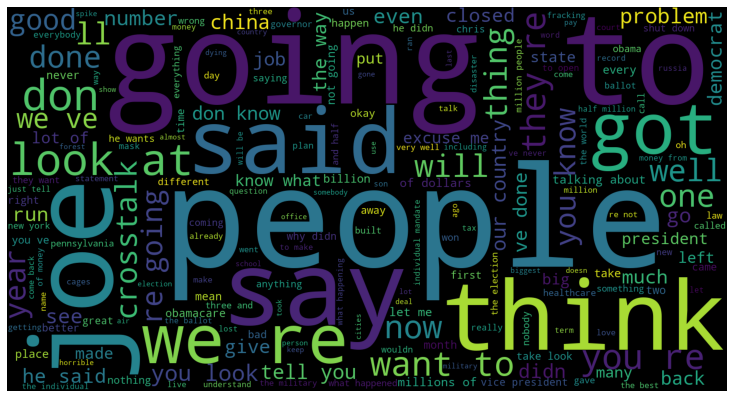

In [109]:
import matplotlib.pyplot as plt

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in trump: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

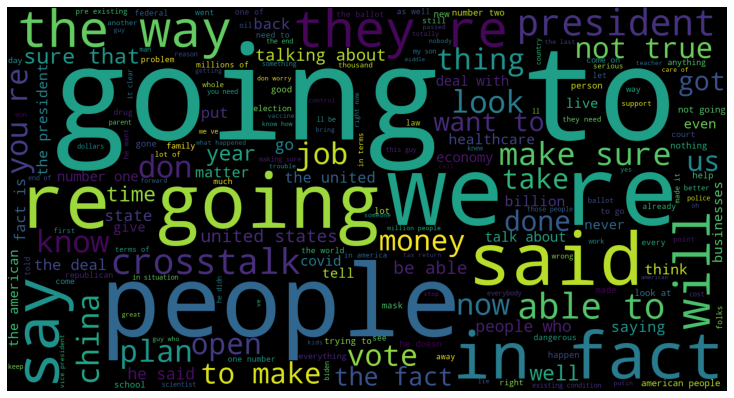

In [111]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in biden: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

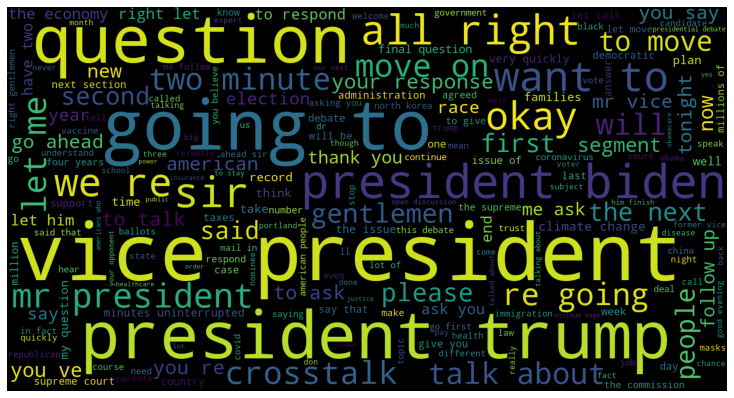

In [112]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in moderator: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [113]:
trump_town_hall = pd.read_csv('data/csv/us_election_2020_trump_town_hall.csv')

In [114]:
trump_town_hall.head(20)

,speaker,minute,text
0,Savannah Guthrie,03:50,"It’s nothing but noise. What? Okay. All right,..."
1,Speaker 1,04:35,This is an NBC news special presentation of To...
2,Savannah Guthrie,04:40,"Tonight, Donald Trump in the arena. His first ..."
3,President Trump,04:48,"I’m feeling great, I don’t know about you. How..."
4,Savannah Guthrie,04:51,"With tonight’s debate canceled, the President ..."
5,President Trump,05:00,"It’s great to be back in my home state, Florid..."
6,Savannah Guthrie,05:06,"With just 19 days to go, the President makes h..."
7,President Trump,05:10,My goal is to fight for you and fight for your...
8,Speaker 1,05:16,"From NBC News, Decision 2020, President Trump ..."
9,Savannah Guthrie,05:28,"Hi everybody, and good evening. It’s good to h..."
